# Initial Data Loading and Exploration
Loaded the dataset using pandas, which is essential for handling and manipulating the data.
Printed the first few rows, dataset information, and category distribution, which are crucial steps to understand the structure and composition of data.

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('News_Category_Dataset_v3.csv')

# Perform initial exploration
print(df.head())  # View the first few rows of the dataset
print(df.info())  # Get a concise summary of the dataframe
print(df['category'].value_counts())  # Check the distribution of categories

# Plot the distribution of categories
import matplotlib.pyplot as plt

# Assuming you've already loaded the dataset into df

# Check the distribution of categories
category_counts = df['category'].value_counts()

# Print the distribution of categories
print(category_counts)

# Display basic information about the dataset
print(df.shape)

   Unnamed: 0                                           headline   category  \
0           0  Over 4 Million Americans Roll Up Sleeves For O...  U.S. NEWS   
1           1  American Airlines Flyer Charged, Banned For Li...  U.S. NEWS   
2           2  23 Of The Funniest Tweets About Cats And Dogs ...     COMEDY   
3           3  The Funniest Tweets From Parents This Week (Se...  PARENTING   
4           4  Woman Who Called Cops On Black Bird-Watcher Lo...  U.S. NEWS   

                                   short_description               authors  \
0  Health experts said it is too early to predict...  Carla K. Johnson, AP   
1  He was subdued by passengers and crew when he ...        Mary Papenfuss   
2  "Until you have a dog you don't understand wha...         Elyse Wanshel   
3  "Accidentally put grown-up toothpaste on my to...      Caroline Bologna   
4  Amy Cooper accused investment firm Franklin Te...        Nina Golgowski   

         date  headline_length  short_description_length

# Category Consolidation
Mapped similar categories together, which is a preprocessing step to reduce the granularity of categories when they represent the same content.

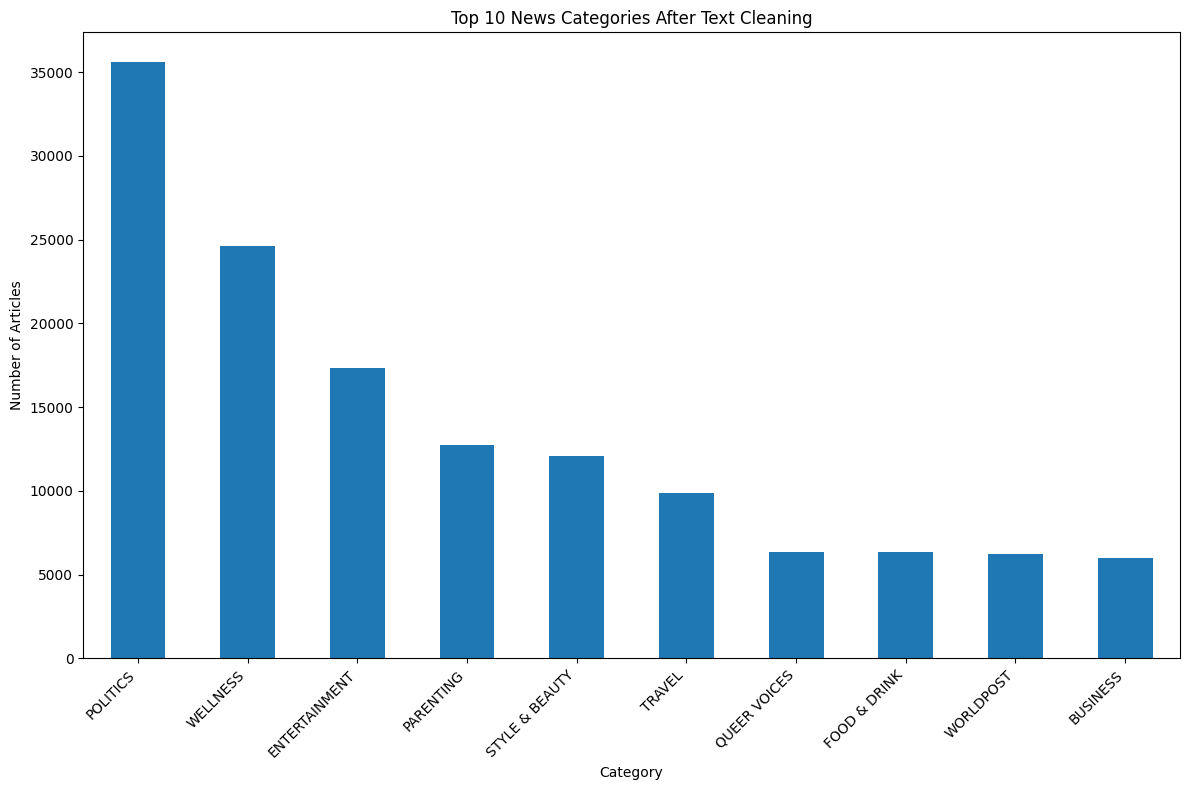

In [2]:
# Define the category mapping
category_mapping = {
    'PARENTS': 'PARENTING',
    'STYLE': 'STYLE & BEAUTY',
    'THE WORLDPOST': 'WORLDPOST',
    'ARTS': 'ARTS & CULTURE',
    'CULTURE & ARTS': 'ARTS & CULTURE',
    'HEALTHY LIVING': 'WELLNESS',
}

# Apply the mapping to consolidate categories
df['category'] = df['category'].replace(category_mapping)

category_counts = df['category'].value_counts()

# Plotting the distribution of the top 10 categories
plt.figure(figsize=(12, 8))  # Adjust the figure size as necessary
category_counts[:10].plot(kind='bar')  # Slice the first 10 categories
plt.title('Top 10 News Categories After Text Cleaning')
plt.xlabel('Category')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45, ha='right')  # Rotate category labels for better readability
plt.tight_layout()  # Adjust layout to make room for the rotated category labels

plt.show()

# Text Cleaning and Lemmatization
Performs text cleaning, including lowercasing, removing digits and special characters, and lemmatization. Lemmatization is particularly useful as it reduces words to their base or dictionary form, helping in generalizing model

In [3]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import pos_tag

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')

# Assuming df is your DataFrame and it's already been loaded
# Example: df = pd.read_csv('your_dataset.csv')

# Set of English stopwords
stop_words = set(stopwords.words('english'))

# Initialize the WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

# Helper function to map NLTK's part-of-speech tags to WordNet's
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

def clean_text_batch(text_series):
    def clean_tokens(text):
        # Lowercase and remove special characters
        text = text.lower()
        text = re.sub(r'\d+', '', text)  # Remove digits
        text = re.sub(r'\W+', ' ', text)  # Replace all non-word chars with space
        
        # Tokenize the text and perform part-of-speech tagging
        tokens = word_tokenize(text)
        tagged_tokens = pos_tag(tokens)
        
        # Lemmatize each token based on its part-of-speech tag
        lemmatized_tokens = []
        for token, tag in tagged_tokens:
            pos = get_wordnet_pos(tag)
            if pos:
                lemmatized_token = lemmatizer.lemmatize(token, pos)
            else:
                lemmatized_token = token  # No lemmatization without a valid pos tag
            if lemmatized_token not in stop_words:
                lemmatized_tokens.append(lemmatized_token)
        
        return ' '.join(lemmatized_tokens)
    
    return text_series.apply(clean_tokens)

# Combine 'headline' and 'short_description' into a single text column for cleaning
df['combined_text'] = df['headline'].astype(str) + ' ' + df['short_description'].astype(str)

# Apply the optimized text cleaning function with lemmatization
df['clean_combined_text'] = clean_text_batch(df['combined_text'])

# Print the first few rows to verify the cleaning
print(df[['combined_text', 'clean_combined_text']].head())


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\52347\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\52347\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\52347\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\52347\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\52347\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


                                       combined_text  \
0  Over 4 Million Americans Roll Up Sleeves For O...   
1  American Airlines Flyer Charged, Banned For Li...   
2  23 Of The Funniest Tweets About Cats And Dogs ...   
3  The Funniest Tweets From Parents This Week (Se...   
4  Woman Who Called Cops On Black Bird-Watcher Lo...   

                                 clean_combined_text  
0  million american roll sleeve omicron target co...  
1  american airline flyer charge ban life punch f...  
2  funny tweet cat dog week sept dog understand c...  
3  funny tweet parent week sept accidentally put ...  
4  woman call cop black bird watcher lose lawsuit...  


# Text Tokenization and Vectorization
Using TfidfVectorizer with specified ngram_range, max_df, and min_df parameters allows you to extract meaningful features from the text, focusing on relevant terms while ignoring too common or too rare words.

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer with specific parameters for text processing
vectorizer = TfidfVectorizer(
    # ngram_range: Defines the lower and upper boundary of the range of n-values for different n-grams to be extracted.
    # Setting ngram_range=(1,1) means that only unigrams (single words) will be used as features.
    ngram_range=(1,1),
    
    # max_df: When building the vocabulary, ignore terms that have a document frequency strictly higher than the given threshold.
    # This argument can be specified as a float in the range [0.0, 1.0] and represents a proportion of documents.
    # max_df=0.8 means "ignore terms that appear in more than 80% of the documents" as these terms are too common.
    max_df=0.8,
    
    # min_df: When building the vocabulary, ignore terms that have a document frequency strictly lower than the given threshold.
    # This argument can be specified as an integer (absolute count) or a float in the range [0.0, 1.0] which represents a proportion of documents.
    # min_df=100 means "ignore terms that appear in fewer than 100 documents" as these terms are too rare.
    min_df=100
)

# Fit and transform the clean combined text to a matrix of TF-IDF features
X_tfidf = vectorizer.fit_transform(df['clean_combined_text'])

print("Shape of TF-IDF Matrix:", X_tfidf.shape)

# Convert the TF-IDF sparse matrix to a DataFrame
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer.get_feature_names_out())

# Print the entire DataFrame
print(tfidf_df)

Shape of TF-IDF Matrix: (209527, 4441)
        aaron  abandon  abc  ability  able  abortion  abroad  absence  \
0         0.0      0.0  0.0      0.0   0.0       0.0     0.0      0.0   
1         0.0      0.0  0.0      0.0   0.0       0.0     0.0      0.0   
2         0.0      0.0  0.0      0.0   0.0       0.0     0.0      0.0   
3         0.0      0.0  0.0      0.0   0.0       0.0     0.0      0.0   
4         0.0      0.0  0.0      0.0   0.0       0.0     0.0      0.0   
...       ...      ...  ...      ...   ...       ...     ...      ...   
209522    0.0      0.0  0.0      0.0   0.0       0.0     0.0      0.0   
209523    0.0      0.0  0.0      0.0   0.0       0.0     0.0      0.0   
209524    0.0      0.0  0.0      0.0   0.0       0.0     0.0      0.0   
209525    0.0      0.0  0.0      0.0   0.0       0.0     0.0      0.0   
209526    0.0      0.0  0.0      0.0   0.0       0.0     0.0      0.0   

        absolute  absolutely  ...  youtube  zealand  zen  zero  zika  zoe  \
0      

# Feature Extraction
## Word Count and Sentence Length
Extracted additional textual features like word count and average sentence length, which can provide valuable signals for classification tasks.
## N-Grams Analysis
Analyzed top unigrams and bigrams, excluding specific bigrams you deemed irrelevant. This analysis can offer insights into the most significant terms and inform further feature engineering or preprocessing steps.

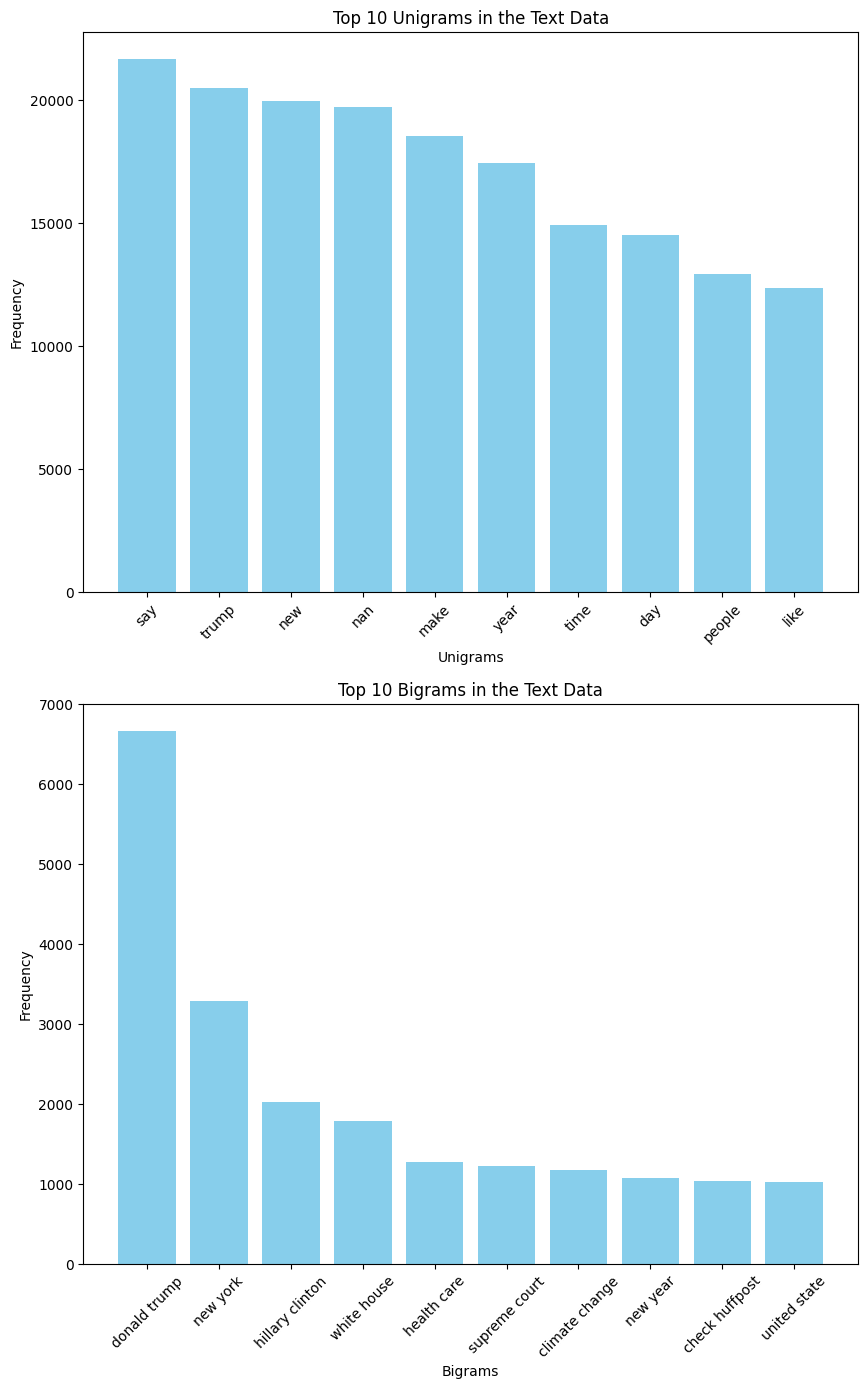

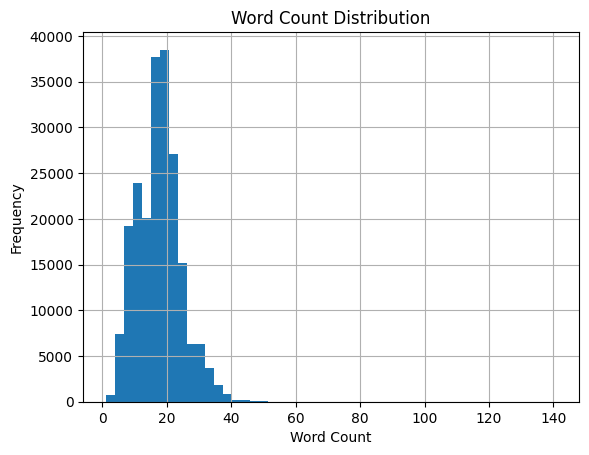

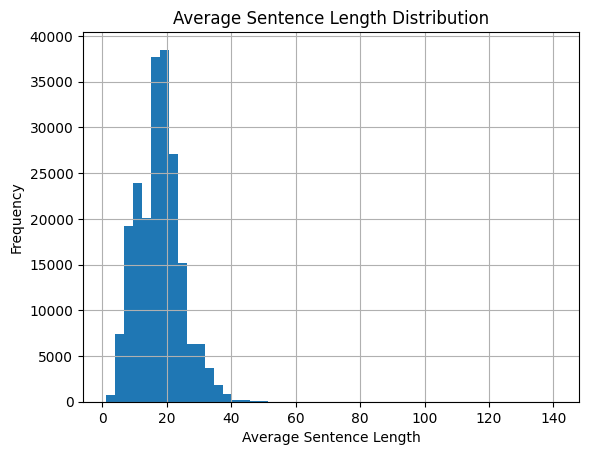

In [5]:
df['word_count'] = df['clean_combined_text'].apply(lambda x: len(x.split()))
from nltk.tokenize import sent_tokenize

def avg_sentence_length(text):
    sentences = sent_tokenize(text)
    if sentences:
        return sum(len(sentence.split()) for sentence in sentences) / len(sentences)
    else:
        return 0

df['avg_sentence_length'] = df['clean_combined_text'].apply(avg_sentence_length)


from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngrams(corpus, n=None, ngram_range=(1,1), skip_bigrams=None):
    vec = CountVectorizer(ngram_range=ngram_range, stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    
    # If looking for bigrams and there are specific bigrams to skip, apply the filter
    if ngram_range == (2,2) and skip_bigrams:
        words_freq = [item for item in words_freq if item[0] not in skip_bigrams]
    
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Define the bigrams you want to skip
skip_bigrams = ['year old', 'look like']

# Extract top 10 unigrams
top_unigrams = get_top_ngrams(df['clean_combined_text'], n=10, ngram_range=(1,1))

# Extract top 10 bigrams
top_bigrams = get_top_ngrams(df['clean_combined_text'], n=10, ngram_range=(2,2), skip_bigrams=skip_bigrams)

# Unzip unigrams and their frequencies into two lists
unigrams, uni_frequencies = zip(*top_unigrams)

# Unzip bigrams and their frequencies into two lists
bigrams, bi_frequencies = zip(*top_bigrams)

# Set up the matplotlib figure and axes for a side-by-side bar chart
fig, ax = plt.subplots(2, 1, figsize=(10, 16))  # Create 2 plots: one for unigrams, one for bigrams

# Plot for top 10 unigrams
ax[0].bar(unigrams, uni_frequencies, color='skyblue')
ax[0].set_title('Top 10 Unigrams in the Text Data')
ax[0].set_xlabel('Unigrams')
ax[0].set_ylabel('Frequency')
ax[0].tick_params(axis='x', rotation=45)  # Rotate the unigrams for better readability

# Plot for top 10 bigrams
ax[1].bar(bigrams, bi_frequencies, color='skyblue')
ax[1].set_title('Top 10 Bigrams in the Text Data')
ax[1].set_xlabel('Bigrams')
ax[1].set_ylabel('Frequency')
ax[1].tick_params(axis='x', rotation=45)  # Rotate the bigrams for better readability

# Display the plots
plt.show()

# Word Count Distribution
df['word_count'].hist(bins=50)
plt.title('Word Count Distribution')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

# Average Sentence Length Distribution
df['avg_sentence_length'].hist(bins=50)
plt.title('Average Sentence Length Distribution')
plt.xlabel('Average Sentence Length')
plt.ylabel('Frequency')
plt.show()


# Divide the dataset into training and testing sets
Splits arrays or matrices into random train and test subsets, dealing with a classification task with potentially multiple categories with LabelEncoder. reserve about 20% of the dataset for testing

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df['category'])

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_encoded, test_size=0.2, random_state=42)

# Logistic Regression performance
Use the Logistic Regression model from sklearn.linear_model. After training, you will evaluate the model using accuracy, precision, recall, and F1-score as metrics

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Evaluation
print("Logistic Regression Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_lr, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_lr, average='weighted'))

report = classification_report(y_test, y_pred_lr, target_names=label_encoder.classes_, digits=2)

print("Logistic Regression Report:")
print(report)


Logistic Regression Metrics:
Accuracy: 0.6261871808332936
Precision: 0.6132059000478933
Recall: 0.6261871808332936
F1 Score: 0.6056093756358304
Logistic Regression Report:
                precision    recall  f1-score   support

ARTS & CULTURE       0.56      0.40      0.47       770
  BLACK VOICES       0.49      0.30      0.37       889
      BUSINESS       0.49      0.43      0.46      1216
       COLLEGE       0.42      0.29      0.34       202
        COMEDY       0.55      0.37      0.44      1022
         CRIME       0.55      0.52      0.53       713
       DIVORCE       0.82      0.64      0.72       664
     EDUCATION       0.46      0.25      0.33       209
 ENTERTAINMENT       0.56      0.72      0.63      3419
   ENVIRONMENT       0.66      0.21      0.32       313
         FIFTY       0.37      0.07      0.12       263
  FOOD & DRINK       0.62      0.71      0.66      1270
     GOOD NEWS       0.41      0.12      0.18       270
         GREEN       0.41      0.31      0.

<Figure size 2000x2000 with 0 Axes>

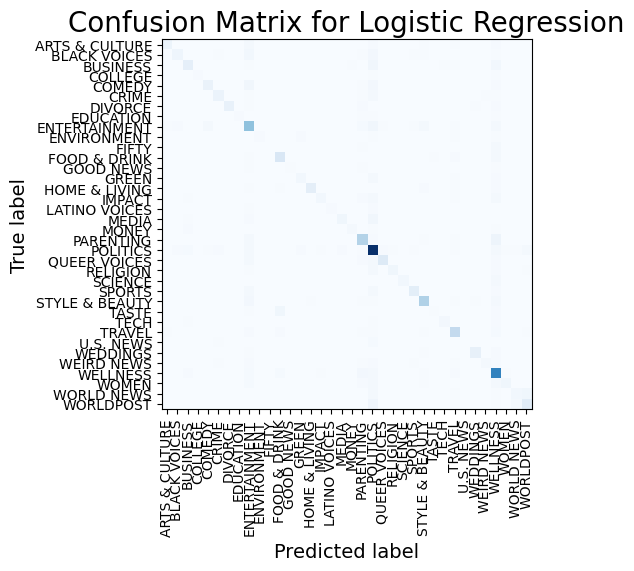

In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calculate confusion matrix for logistic regression
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

# Set the figure size for a larger display
plt.figure(figsize=(20, 20))  # Adjust the size as needed for clarity

# Visualize the confusion matrix without displaying numbers in the cells
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_lr, display_labels=label_encoder.classes_)

# Plot and adjust label sizes
disp.plot(cmap='Blues', colorbar=False, include_values=False)  # Hide cell values
plt.title('Confusion Matrix for Logistic Regression', fontsize=20)  # Adjust title font size as needed
plt.xticks(rotation=90, fontsize=10)  # Rotate and adjust x-axis labels font size
plt.yticks(fontsize=10)  # Adjust y-axis labels font size
plt.xlabel('Predicted label', fontsize=14)  # Adjust x-axis title font size
plt.ylabel('True label', fontsize=14)  # Adjust y-axis title font size

plt.show()


# Random Forest performance
implement a Random Forest classifier and evaluate its performance on the test set using accuracy, precision, recall, and F1-score

In [16]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Basic Evaluation
print("Random Forest Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_rf, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_rf, average='weighted'))

# Detailed Classification Report
report_rf = classification_report(y_test, y_pred_rf, target_names=label_encoder.classes_, digits=2)
print("\nRandom Forest Classification Report:")
print(report_rf)



Random Forest Metrics:
Accuracy: 0.5703240586073594
Precision: 0.5688841266243876
Recall: 0.5703240586073594
F1 Score: 0.5370695256477014

Random Forest Classification Report:
                precision    recall  f1-score   support

ARTS & CULTURE       0.50      0.32      0.39       770
  BLACK VOICES       0.49      0.25      0.33       889
      BUSINESS       0.45      0.32      0.38      1216
       COLLEGE       0.37      0.28      0.32       202
        COMEDY       0.53      0.29      0.38      1022
         CRIME       0.47      0.40      0.43       713
       DIVORCE       0.85      0.62      0.72       664
     EDUCATION       0.45      0.21      0.28       209
 ENTERTAINMENT       0.49      0.64      0.56      3419
   ENVIRONMENT       0.85      0.12      0.22       313
         FIFTY       0.50      0.04      0.07       263
  FOOD & DRINK       0.55      0.66      0.60      1270
     GOOD NEWS       0.33      0.06      0.10       270
         GREEN       0.39      0.18    

<Figure size 2000x2000 with 0 Axes>

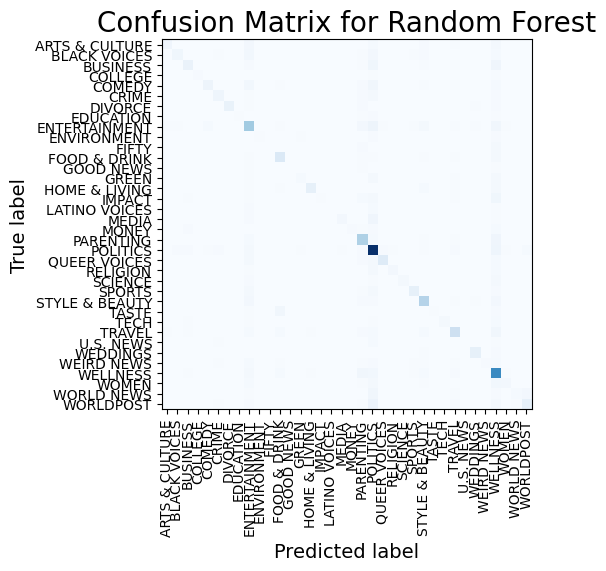

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Calculate confusion matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Set the figure size for a larger display
plt.figure(figsize=(20, 20))  # Adjust the size as needed for clarity

# Visualize the confusion matrix without displaying numbers in the cells
disp_rf = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf, display_labels=label_encoder.classes_)

# Plot and adjust label sizes
disp_rf.plot(cmap='Blues', colorbar=False, include_values=False)  # Hide cell values
plt.title('Confusion Matrix for Random Forest', fontsize=20)  # Adjust title font size as needed
plt.xticks(rotation=90, fontsize=10)  # Rotate and adjust x-axis labels font size
plt.yticks(fontsize=10)  # Adjust y-axis labels font size
plt.xlabel('Predicted label', fontsize=14)  # Adjust x-axis title font size
plt.ylabel('True label', fontsize=14)  # Adjust y-axis title font size

plt.show()


# XGBoost performance
Implement an XGBoost classifier and evaluate its performance on the test set using accuracy, precision, recall, and F1-score

In [18]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Initialize the XGBoost classifier
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Fit the model on the training data
xgb_clf.fit(X_train, y_train)

# Predict on the testing data
y_pred_xgb = xgb_clf.predict(X_test)

# Basic Evaluation Metrics
print("XGBoost Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_xgb, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_xgb, average='weighted'))

# Detailed Classification Report
report_xgb = classification_report(y_test, y_pred_xgb, target_names=label_encoder.classes_, digits=2)
print("\nXGBoost Classification Report:")
print(report_xgb)

XGBoost Metrics:
Accuracy: 0.606524125423567
Precision: 0.5927550586358826
Recall: 0.606524125423567
F1 Score: 0.5898145072619422

XGBoost Classification Report:
                precision    recall  f1-score   support

ARTS & CULTURE       0.54      0.42      0.48       770
  BLACK VOICES       0.47      0.32      0.38       889
      BUSINESS       0.50      0.40      0.45      1216
       COLLEGE       0.39      0.39      0.39       202
        COMEDY       0.57      0.39      0.46      1022
         CRIME       0.53      0.49      0.51       713
       DIVORCE       0.79      0.70      0.74       664
     EDUCATION       0.42      0.33      0.37       209
 ENTERTAINMENT       0.54      0.66      0.59      3419
   ENVIRONMENT       0.53      0.25      0.34       313
         FIFTY       0.38      0.13      0.19       263
  FOOD & DRINK       0.60      0.65      0.62      1270
     GOOD NEWS       0.35      0.14      0.20       270
         GREEN       0.41      0.33      0.37       5

<Figure size 2000x2000 with 0 Axes>

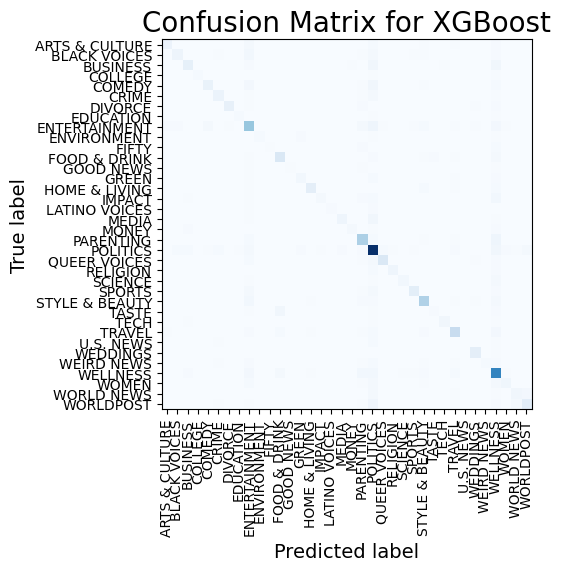

In [19]:
# Calculate confusion matrix for XGBoost
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

# Set the figure size for a larger display
plt.figure(figsize=(20, 20))  # Adjust the size as needed for clarity

# Visualize the confusion matrix without displaying numbers in the cells
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_xgb, display_labels=label_encoder.classes_)

# Plot and adjust label sizes
disp_xgb.plot(cmap='Blues', colorbar=False, include_values=False)  # Hide cell values
plt.title('Confusion Matrix for XGBoost', fontsize=20)  # Adjust title font size as needed
plt.xticks(rotation=90, fontsize=10)  # Rotate and adjust x-axis labels font size
plt.yticks(fontsize=10)  # Adjust y-axis labels font size
plt.xlabel('Predicted label', fontsize=14)  # Adjust x-axis title font size
plt.ylabel('True label', fontsize=14)  # Adjust y-axis title font size

plt.show()

# Ann performance
Evaluate ANN model using more detailed metrics such as precision, recall, and F1-score in addition to accuracy

In [22]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from sklearn.decomposition import TruncatedSVD

# Assuming df['category'] contains your labels and X_tfidf contains your TF-IDF features

# Encode the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df['category'])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_encoded, test_size=0.2, random_state=42)

# Dimensionality Reduction with TruncatedSVD
svd = TruncatedSVD(n_components=300, random_state=42)  # Adjust n_components as needed
X_train_reduced = svd.fit_transform(X_train)
X_test_reduced = svd.transform(X_test)

# Define the ANN model
num_classes = len(np.unique(y_train))
model = Sequential([
    Dense(256, activation='relu', input_dim=X_train_reduced.shape[1]),
    BatchNormalization(),
    Dropout(0.3),  # Adjusted dropout rate
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),  # Adjusted dropout rate
    Dense(num_classes, activation='softmax')
])

# Compile the model with an Adam optimizer with a learning rate scheduler
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define a learning rate scheduler
def lr_schedule(epoch, lr):
    if epoch > 10:
        return 0.0001
    return 0.001

lr_scheduler = LearningRateScheduler(lr_schedule)

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train_reduced, y_train, epochs=30, batch_size=32, validation_split=0.1, verbose=1, callbacks=[early_stopping, lr_scheduler])

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_reduced, y_test, verbose=1)
print(f"Test Accuracy: {accuracy}")

# Generate predictions
y_pred_ann = model.predict(X_test_reduced)
y_pred_ann_classes = np.argmax(y_pred_ann, axis=1)  # Convert probabilities to class labels

# Calculate evaluation metrics
print(classification_report(y_test, y_pred_ann_classes, target_names=label_encoder.classes_))



Epoch 1/30


4715/4715 [==============================] - 12s 2ms/step - loss: 2.0072 - accuracy: 0.4793 - val_loss: 1.6899 - val_accuracy: 0.5399 - lr: 0.0010
Epoch 2/30
4715/4715 [==============================] - 12s 2ms/step - loss: 1.7770 - accuracy: 0.5226 - val_loss: 1.6337 - val_accuracy: 0.5523 - lr: 0.0010
Epoch 3/30
4715/4715 [==============================] - 11s 2ms/step - loss: 1.7211 - accuracy: 0.5341 - val_loss: 1.6094 - val_accuracy: 0.5541 - lr: 0.0010
Epoch 4/30
4715/4715 [==============================] - 10s 2ms/step - loss: 1.6848 - accuracy: 0.5416 - val_loss: 1.5912 - val_accuracy: 0.5605 - lr: 0.0010
Epoch 5/30
4715/4715 [==============================] - 9s 2ms/step - loss: 1.6619 - accuracy: 0.5459 - val_loss: 1.5771 - val_accuracy: 0.5616 - lr: 0.0010
Epoch 6/30
4715/4715 [==============================] - 10s 2ms/step - loss: 1.6381 - accuracy: 0.5497 - val_loss: 1.5618 - val_accuracy: 0.5638 - lr: 0.0010
Epoch 7/30
4715/4715 [============================

<Figure size 2000x2000 with 0 Axes>

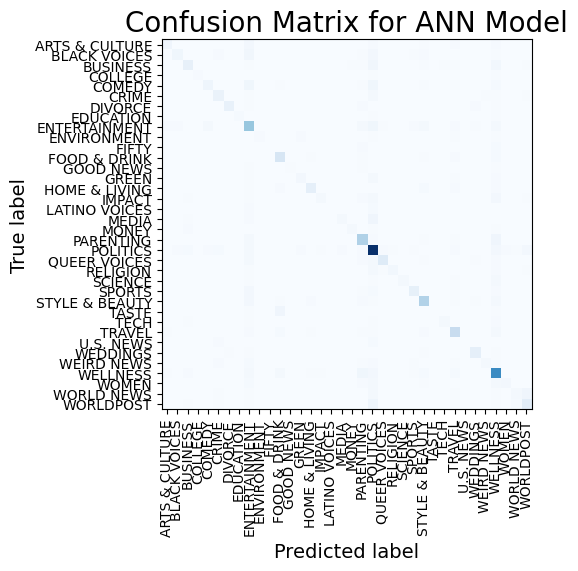

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Calculate confusion matrix for the ANN model
conf_matrix_ann = confusion_matrix(y_test, y_pred_ann_classes)

# Set the figure size for a larger display
plt.figure(figsize=(20, 20))

# Visualize the confusion matrix without displaying numbers in the cells
disp_ann = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_ann, display_labels=label_encoder.classes_)

# Plot and adjust label sizes
disp_ann.plot(cmap='Blues', colorbar=False, include_values=False)
plt.title('Confusion Matrix for ANN Model', fontsize=20)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Predicted label', fontsize=14)
plt.ylabel('True label', fontsize=14)

plt.show()

# CNN performance
Evaluate CNN model using more detailed metrics such as precision, recall, and F1-score in addition to accuracy

In [24]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Assuming 'clean_combined_text' is the column with preprocessed text
texts = df['clean_combined_text'].tolist()

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df['category'])

# Tokenize text
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index
print(f'Found {len(word_index)} unique tokens.')

# Pad sequences
max_len = 300
data = pad_sequences(sequences, maxlen=max_len)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, y_encoded, test_size=0.2, random_state=42)

# Convert labels to categorical
num_classes = np.max(y_encoded) + 1
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Define the CNN model
model = Sequential()
model.add(Embedding(10000, 128, input_length=max_len))
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, batch_size=128, epochs=10, validation_split=0.2)

# Evaluate the model
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

print("Accuracy:", accuracy_score(y_test_classes, y_pred_classes))
print(classification_report(y_test_classes, y_pred_classes, target_names=label_encoder.classes_))


Found 75507 unique tokens.

Epoch 1/10
1048/1048 [==============================] - 58s 55ms/step - loss: 1.8376 - accuracy: 0.5215 - val_loss: 1.3879 - val_accuracy: 0.6236
Epoch 2/10
1048/1048 [==============================] - 62s 59ms/step - loss: 1.1735 - accuracy: 0.6726 - val_loss: 1.3070 - val_accuracy: 0.6366
Epoch 3/10
1048/1048 [==============================] - 58s 55ms/step - loss: 0.9037 - accuracy: 0.7373 - val_loss: 1.3405 - val_accuracy: 0.6364
Epoch 4/10
1048/1048 [==============================] - 63s 60ms/step - loss: 0.6440 - accuracy: 0.8108 - val_loss: 1.4930 - val_accuracy: 0.6227
Epoch 5/10
1048/1048 [==============================] - 65s 62ms/step - loss: 0.3913 - accuracy: 0.8882 - val_loss: 1.7837 - val_accuracy: 0.6058
Epoch 6/10
1048/1048 [==============================] - 63s 60ms/step - loss: 0.2054 - accuracy: 0.9445 - val_loss: 2.1774 - val_accuracy: 0.5942
Epoch 7/10
1048/1048 [==============================] - 64s 61ms/step - loss: 0.1009 - accuracy:

<Figure size 2000x2000 with 0 Axes>

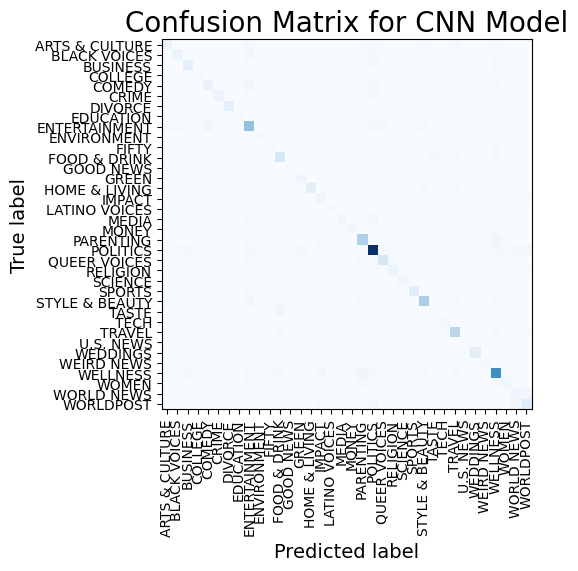

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Calculate confusion matrix for the CNN model
conf_matrix_cnn = confusion_matrix(y_test_classes, y_pred_classes)

# Set the figure size for a larger display
plt.figure(figsize=(20, 20))

# Visualize the confusion matrix without displaying numbers in the cells
disp_cnn = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_cnn, display_labels=label_encoder.classes_)

# Plot and adjust label sizes
disp_cnn.plot(cmap='Blues', colorbar=False, include_values=False)
plt.title('Confusion Matrix for CNN Model', fontsize=20)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Predicted label', fontsize=14)
plt.ylabel('True label', fontsize=14)

plt.show()
